In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

> **Electric Power Consumption Forecasting****

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# prompt: connect drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# prompt: get file from drive

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/electric-power-consumption/powerconsumption.csv') #Change your_file.csv to your file name
print(df.head())


        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4     

In [6]:
df.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4             18442.40964

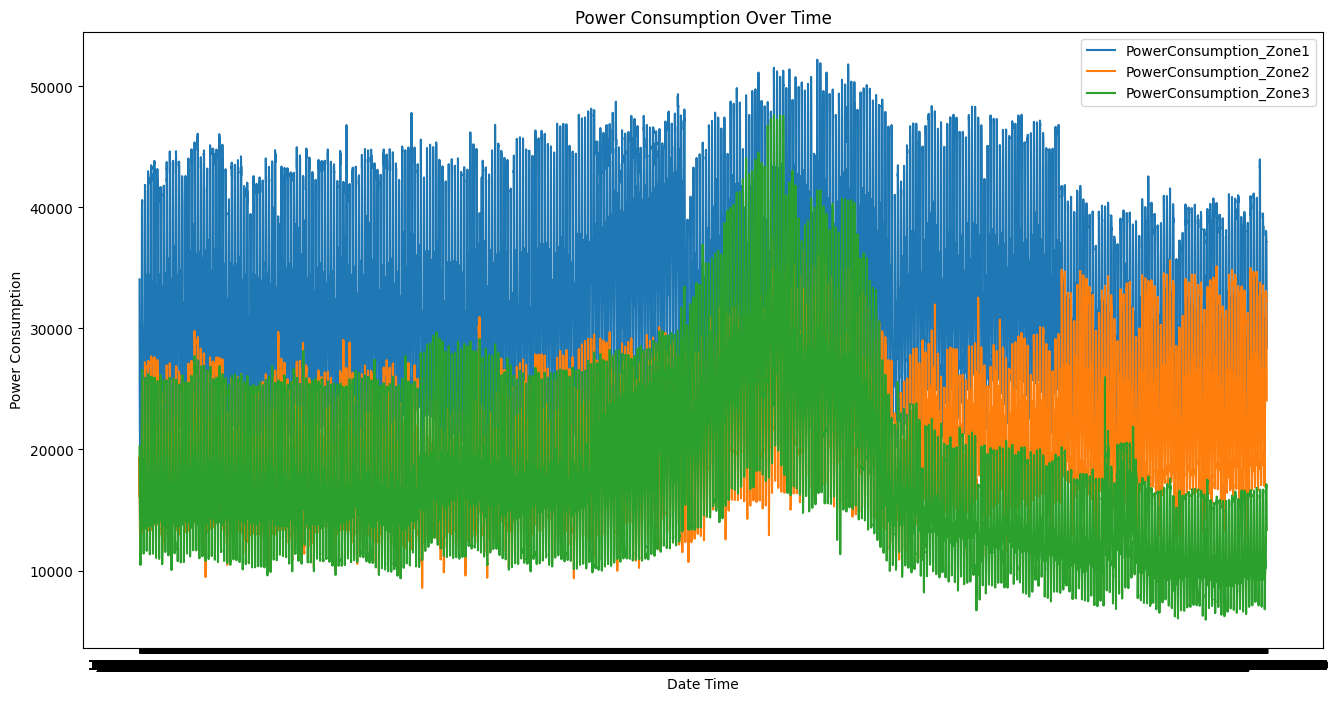

In [7]:
# Visualize power consumption over time
plt.figure(figsize=(16, 8))
plt.plot(df['Datetime'], df['PowerConsumption_Zone1'], label='PowerConsumption_Zone1')
plt.plot(df['Datetime'], df['PowerConsumption_Zone2'], label='PowerConsumption_Zone2')
plt.plot(df['Datetime'], df['PowerConsumption_Zone3'], label='PowerConsumption_Zone3')
plt.title('Power Consumption Over Time')
plt.xlabel('Date Time')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

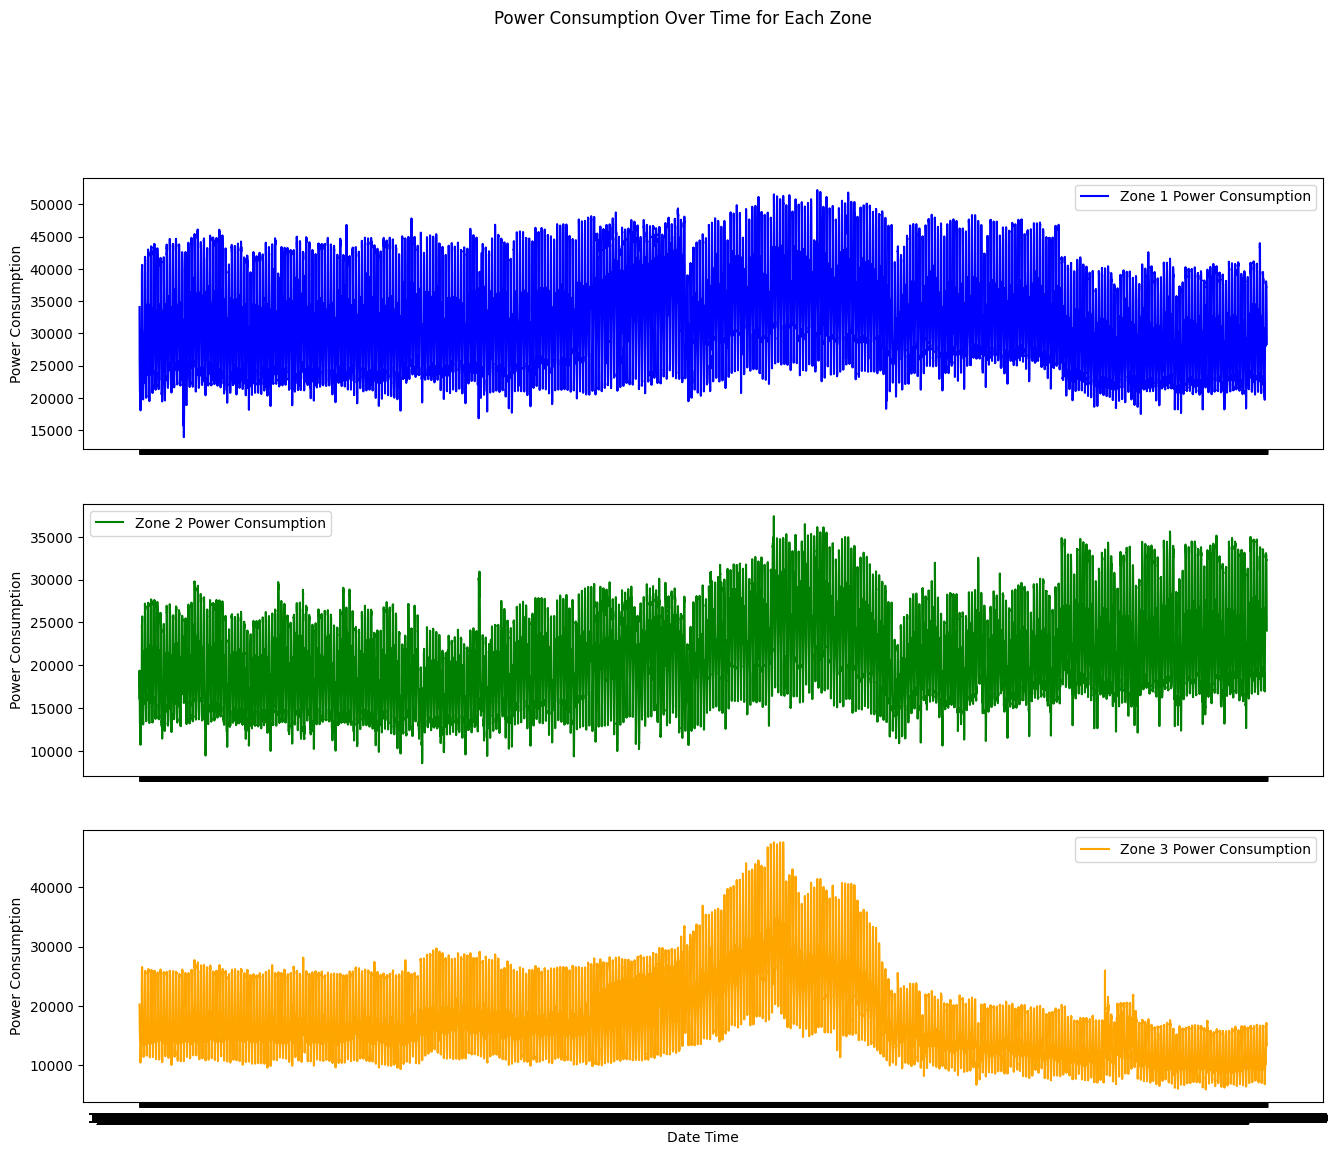

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create subplots for each zone
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharex=True)

# Plot power consumption over time for each zone
axes[0].plot(df['Datetime'], df['PowerConsumption_Zone1'], label='Zone 1 Power Consumption', color='blue')
axes[0].set_ylabel('Power Consumption')
axes[0].legend()

axes[1].plot(df['Datetime'], df['PowerConsumption_Zone2'], label='Zone 2 Power Consumption', color='green')
axes[1].set_ylabel('Power Consumption')
axes[1].legend()

axes[2].plot(df['Datetime'], df['PowerConsumption_Zone3'], label='Zone 3 Power Consumption', color='orange')
axes[2].set_xlabel('Date Time')
axes[2].set_ylabel('Power Consumption')
axes[2].legend()

# Set common title for all subplots
plt.suptitle('Power Consumption Over Time for Each Zone', y=1.02)
plt.show()

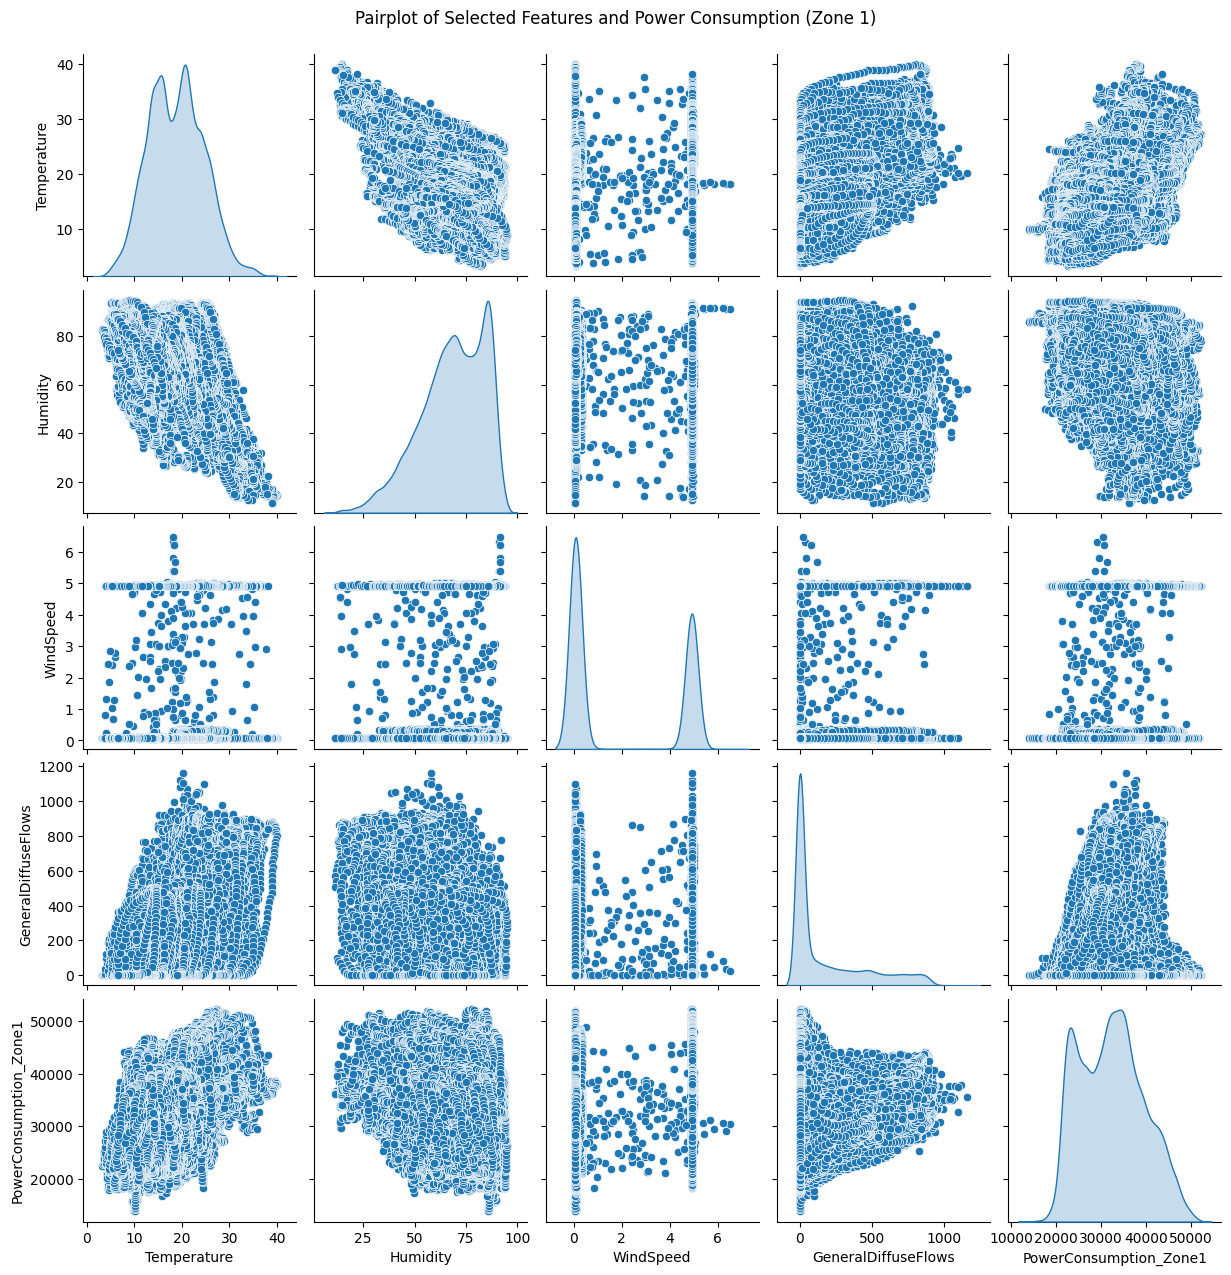

In [9]:
# Pairplot for selected features
selected_features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'PowerConsumption_Zone1']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features and Power Consumption (Zone 1)', y=1.02)
plt.show()

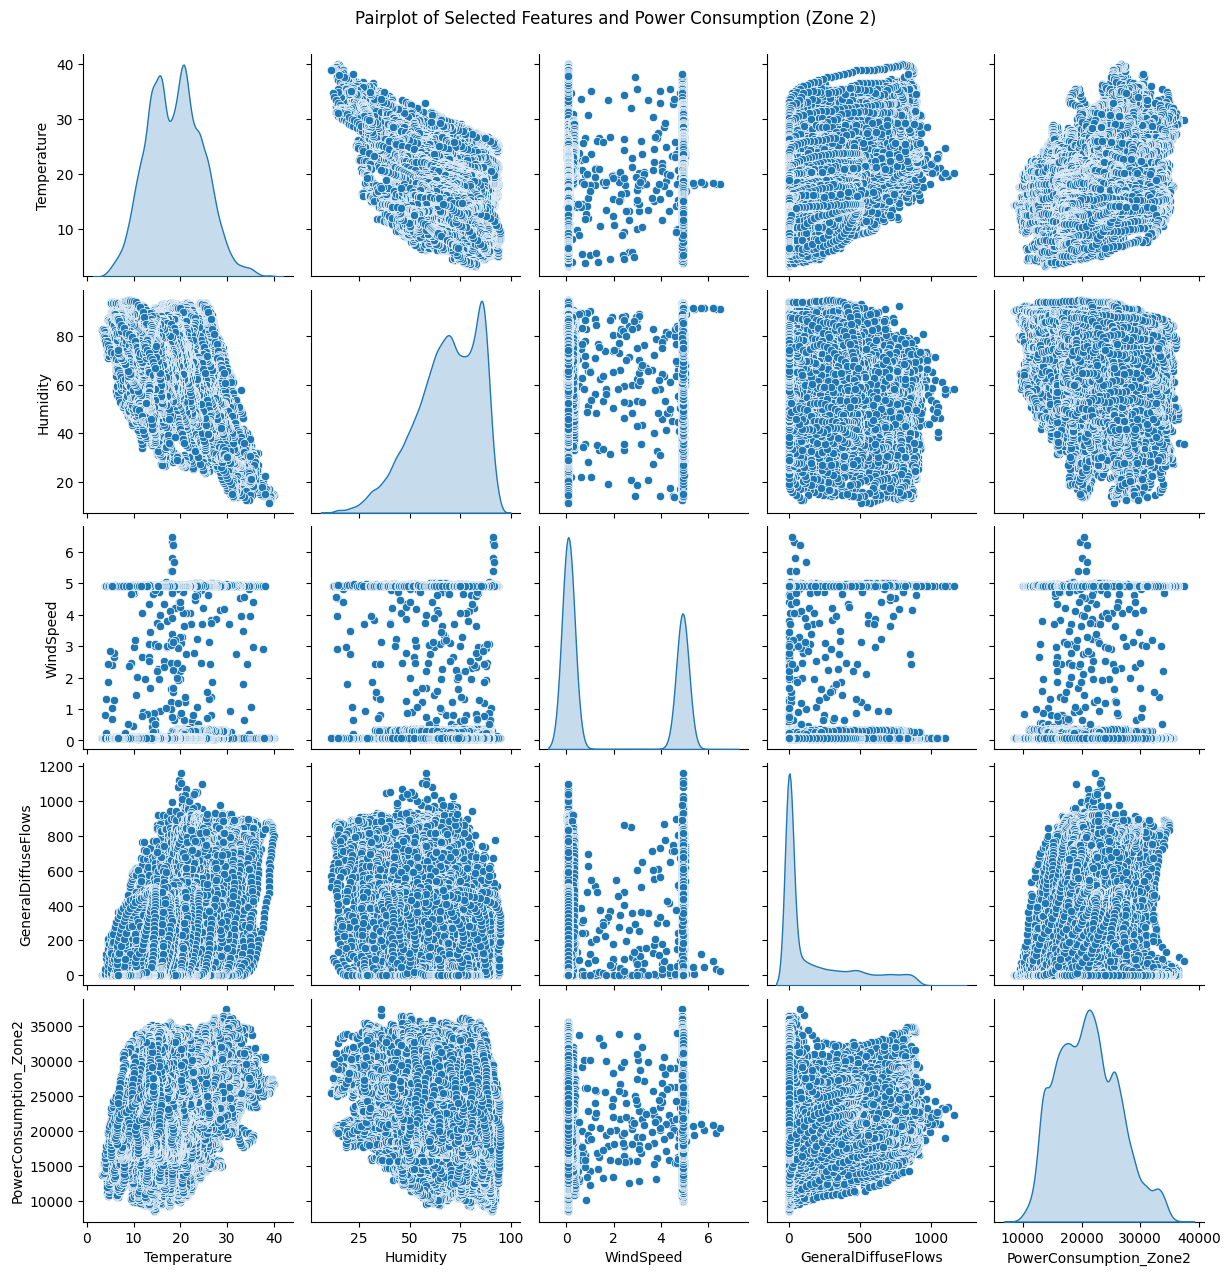

In [10]:
# Pairplot for selected features
selected_features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'PowerConsumption_Zone2']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features and Power Consumption (Zone 2)', y=1.02)
plt.show()

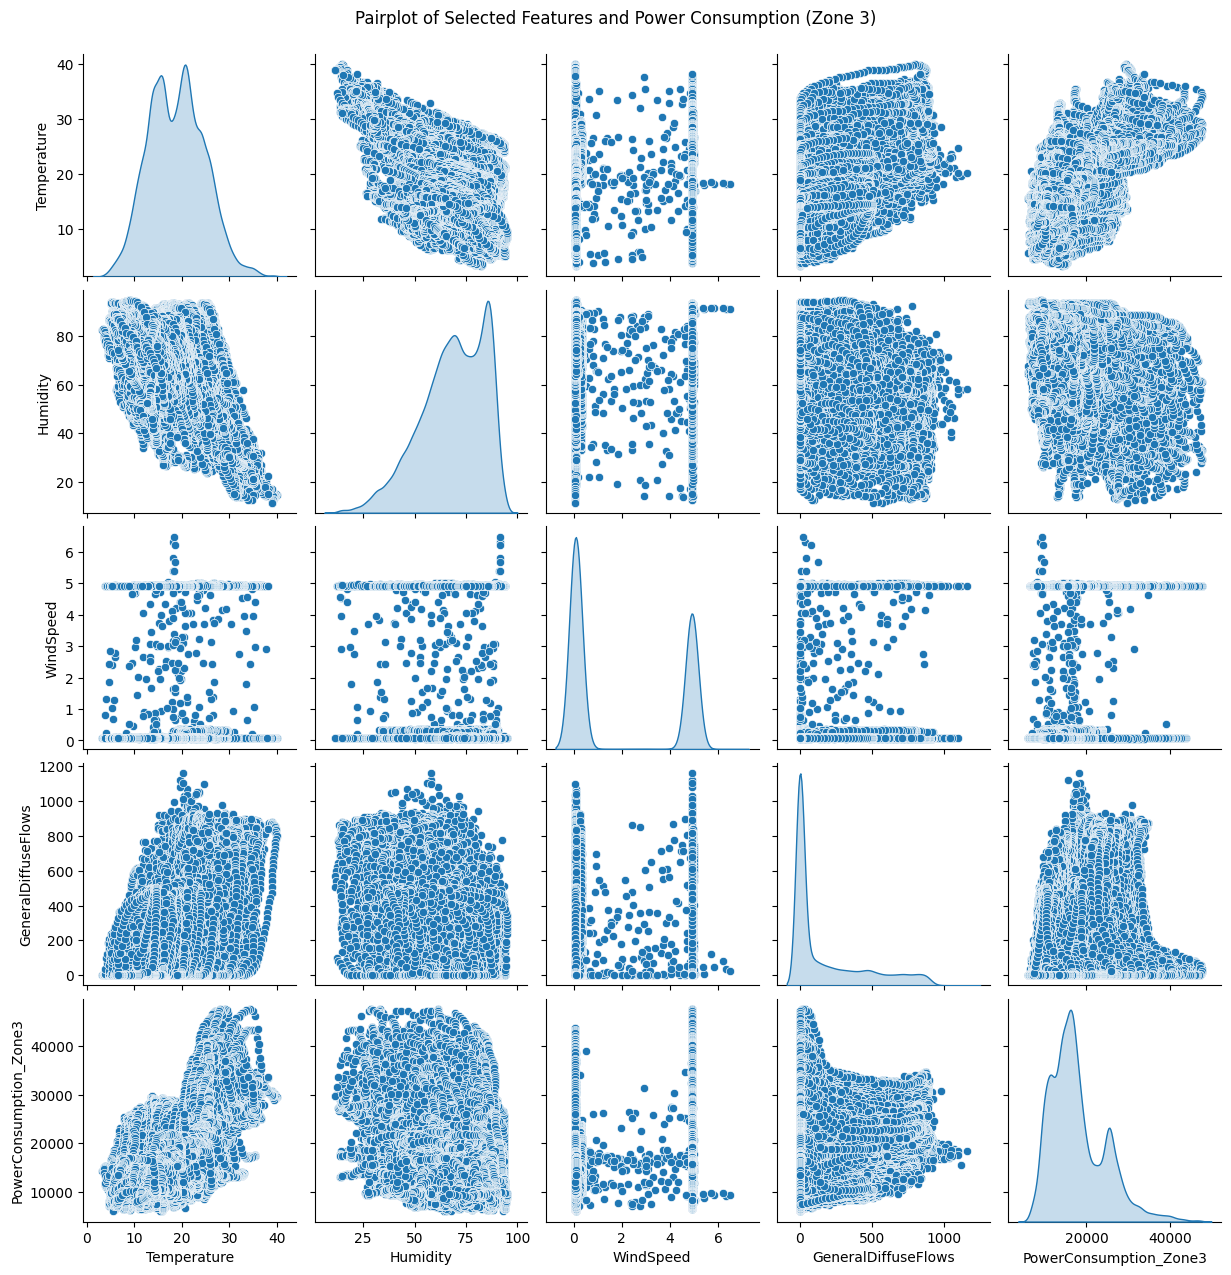

In [11]:
# Pairplot for selected features
selected_features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'PowerConsumption_Zone3']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features and Power Consumption (Zone 3)', y=1.02)
plt.show()

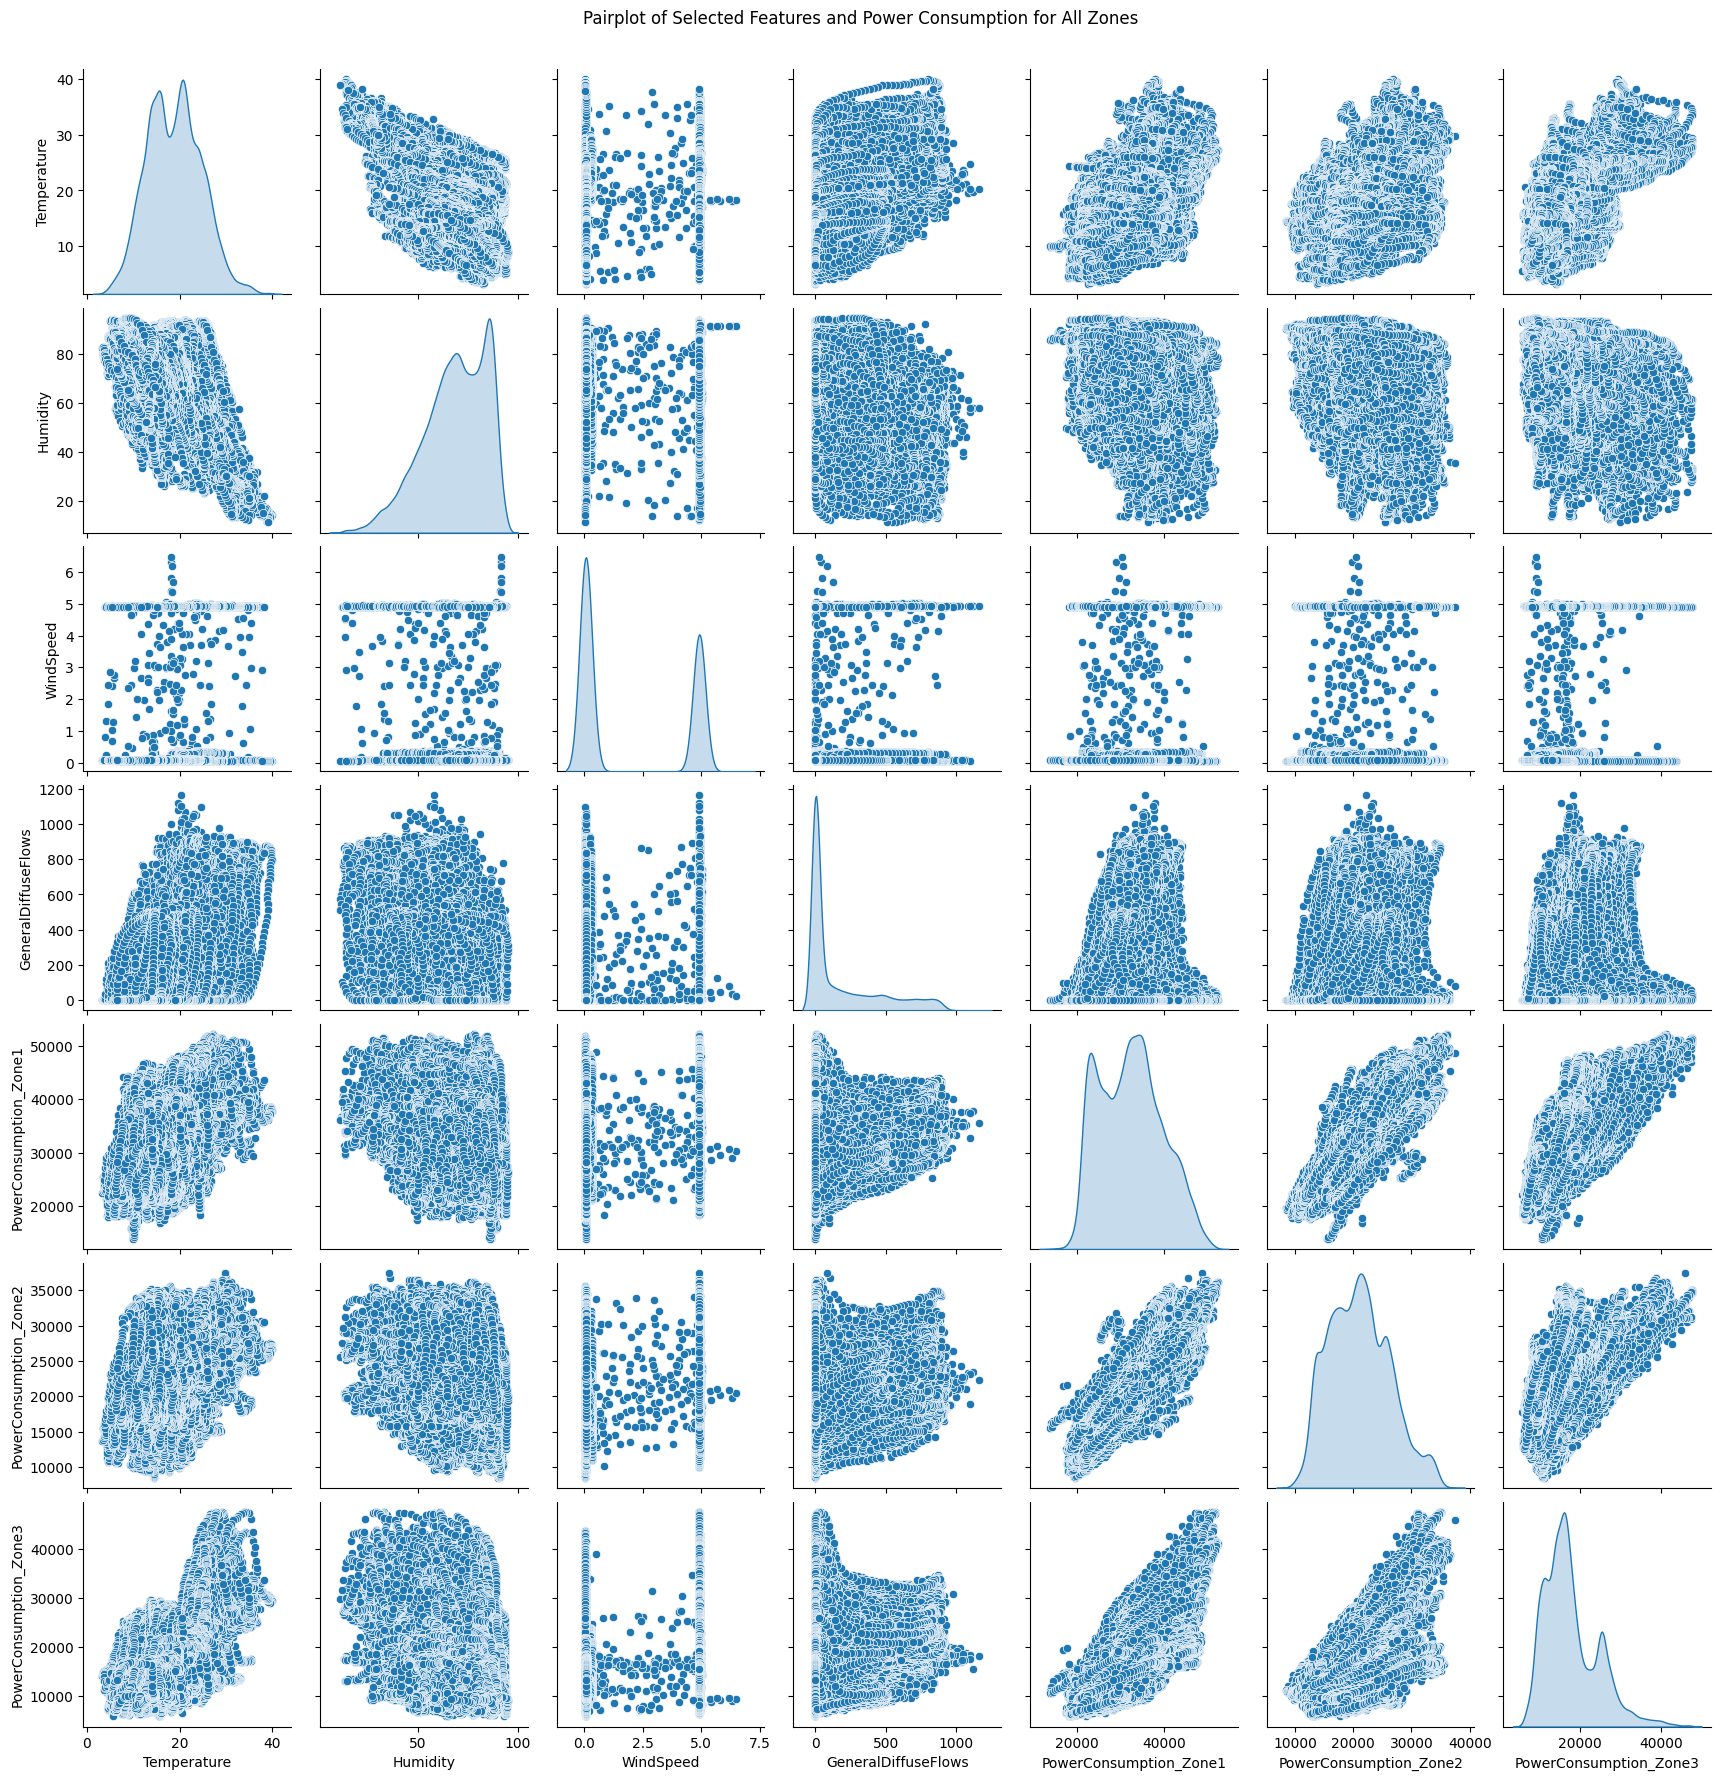

In [12]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for selected features and power consumption for all zones
selected_features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Assuming 'df' is your DataFrame
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features and Power Consumption for All Zones', y=1.02)
plt.show()


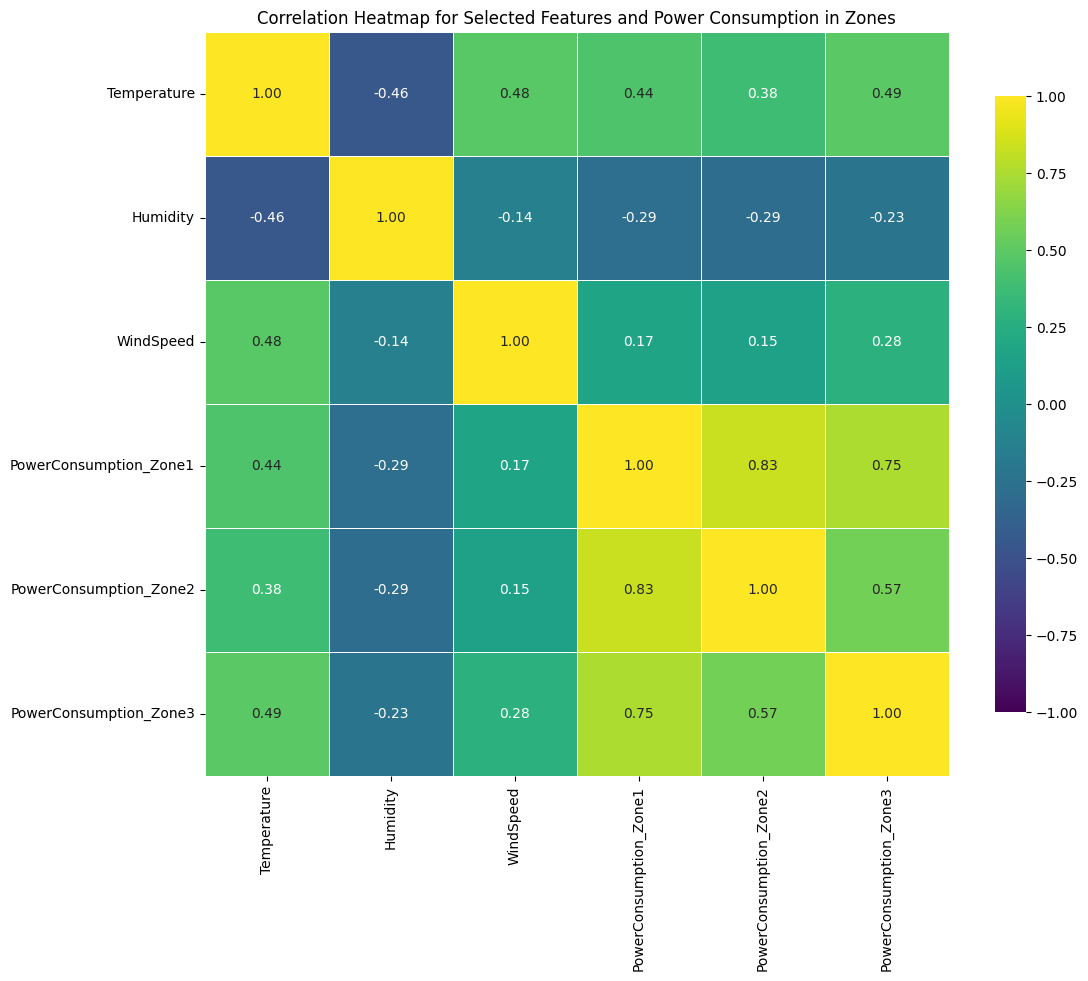

In [13]:
# Calculate correlation matrix
correlation_matrix = df[['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].corr()

# Create a more detailed heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Features and Power Consumption in Zones')
plt.show()


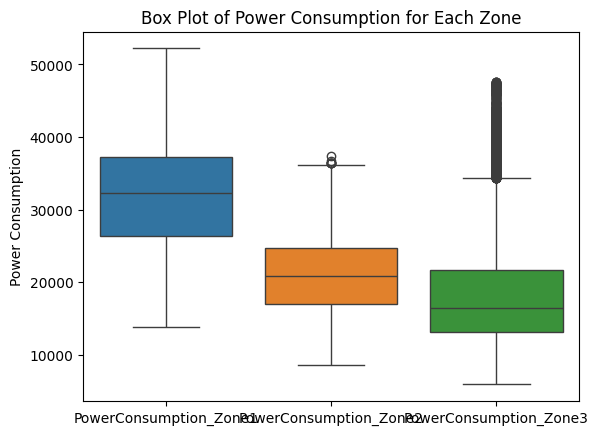

In [14]:
sns.boxplot(data=df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.title('Box Plot of Power Consumption for Each Zone')
plt.ylabel('Power Consumption')
plt.show()

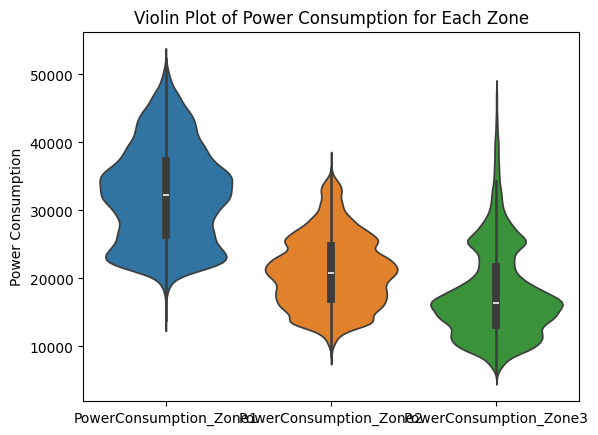

In [15]:
sns.violinplot(data=df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.title('Violin Plot of Power Consumption for Each Zone')
plt.ylabel('Power Consumption')
plt.show()

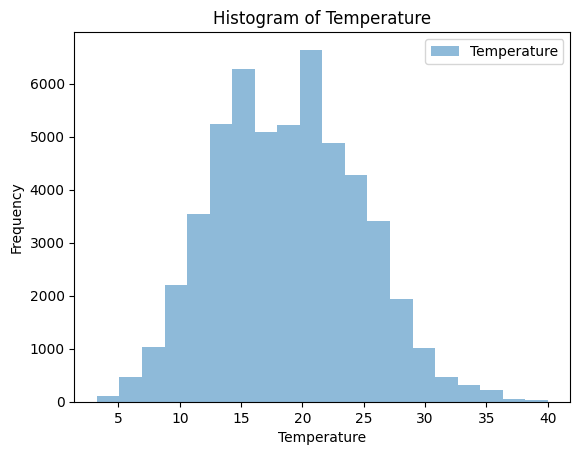

In [16]:
df['Temperature'].plot.hist(bins=20, alpha=0.5, label='Temperature')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<ipython-input-17-6277dec9c4c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_avg_power.index, y=zone_avg_power.values, palette='Set3')


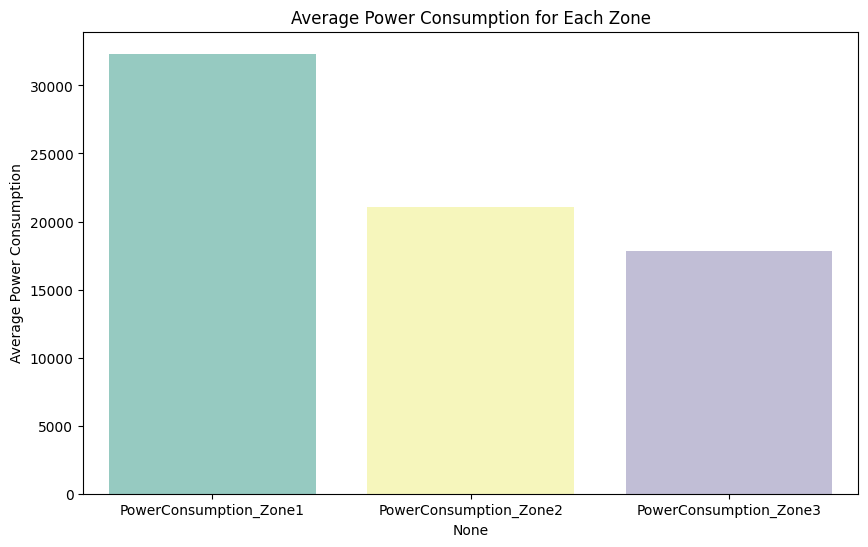

In [17]:
zone_avg_power = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_avg_power.index, y=zone_avg_power.values, palette='Set3')
plt.title('Average Power Consumption for Each Zone')
plt.ylabel('Average Power Consumption')
plt.show()

In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.sort_values(by='Datetime', ascending=True, inplace=True)

# Check if the dataset has chronological order
chronological_order = df['Datetime'].is_monotonic_increasing

# Check if timestamps are equidistant
time_diffs = df['Datetime'].diff()
equidistant_timestamps = time_diffs.nunique() == 1

# Display the results
print(f"Chronological Order: {chronological_order}")
print(f"Equidistant Timestamps: {equidistant_timestamps}")


Chronological Order: True
Equidistant Timestamps: True


In [19]:
# Check for missing values
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [20]:
df

Datetime  Temperature  Humidity  WindSpeed  \
0     2017-01-01 00:00:00        6.559      73.8      0.083   
1     2017-01-01 00:10:00        6.414      74.5      0.083   
2     2017-01-01 00:20:00        6.313      74.5      0.080   
3     2017-01-01 00:30:00        6.121      75.0      0.083   
4     2017-01-01 00:40:00        5.921      75.7      0.081   
...                   ...          ...       ...        ...   
52411 2017-12-30 23:10:00        7.010      72.4      0.080   
52412 2017-12-30 23:20:00        6.947      72.6      0.082   
52413 2017-12-30 23:30:00        6.900      72.8      0.086   
52414 2017-12-30 23:40:00        6.758      73.0      0.080   
52415 2017-12-30 23:50:00        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062         0.100             29128.10127   
3                    0.091         0.096             28228.86076   
4                    0.048         0.085             27335.69620   
...                    ...           ...                     ...   
52411                0.040         0.096             31160.45627   
52412                0.051         0.093             30430.41825   
52413                0.084         0.074             29590.87452   
52414                0.066         0.089             28958.17490   
52415                0.062         0.111             28349.80989   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
0                 16128.87538             20240.96386  
1                 19375.07599             20131.08434  
2                 19006.68693             19668.43373  
3                 18361.09422             18899.27711  
4                 17872.34043             18442.40964  
...                       ...                     ...  
52411             26857.31820             14780.31212  
52412             26124.57809             14428.81152  
52413             25277.69254             13806.48259  
52414             24692.23688             13512.60504  
52415             24055.23167             13345.49820  

[52416 rows x 9 columns]

In [21]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['year'] = df.index.year

    # Calculate season more efficiently
    df['season'] = (df['month'] - 1) // 3 + 1

    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week

    # Additional features
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = (df['day'] == 1).astype(int)
    df['is_month_end'] = (df['day'] == df.index.days_in_month).astype(int)
    df['is_quarter_start'] = (df['day'] == 1) & (df['month'] % 3 == 1).astype(int)
    df['is_quarter_end'] = (df['day'] == df.groupby(['year', 'quarter'])['day'].transform('max'))

    # Additional features
    df['is_working_day'] = df['dayofweek'].isin([0, 1, 2, 3, 4]).astype(int)
    df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
    df['is_peak_hour'] = df['hour'].isin([8, 12, 18]).astype(int)

    # Minute-level features
    df['minute_of_day'] = df['hour'] * 60 + df['minute']
    df['minute_of_week'] = (df['dayofweek'] * 24 * 60) + df['minute_of_day']

    return df.astype(float)

df = df.set_index('Datetime')
df = create_features(df)
df[['year', 'month', 'day', 'minute', 'dayofyear', 'weekofyear', 'quarter', 'season']].head()


year  month  day  minute  dayofyear  weekofyear  \
Datetime                                                                 
2017-01-01 00:00:00  2017.0    1.0  1.0     0.0        1.0        52.0   
2017-01-01 00:10:00  2017.0    1.0  1.0    10.0        1.0        52.0   
2017-01-01 00:20:00  2017.0    1.0  1.0    20.0        1.0        52.0   
2017-01-01 00:30:00  2017.0    1.0  1.0    30.0        1.0        52.0   
2017-01-01 00:40:00  2017.0    1.0  1.0    40.0        1.0        52.0   

                     quarter  season  
Datetime                              
2017-01-01 00:00:00      1.0     1.0  
2017-01-01 00:10:00      1.0     1.0  
2017-01-01 00:20:00      1.0     1.0  
2017-01-01 00:30:00      1.0     1.0  
2017-01-01 00:40:00      1.0     1.0

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Separate the input features (X) and target variables (y)
X = df.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

# Initialize StandardScaler for y
scaler_y = StandardScaler()

# Fit and transform  y
y_scaled = scaler_y.fit_transform(y)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

In [26]:
# Reshape input data for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [27]:
# Alternatively, you can use Input layer
model_lstm = Sequential()
model_lstm.add(Input(shape=(1, X_train.shape[1])))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(3))  # Output layer with 3 nodes for the three zones
model_lstm.compile(optimizer='adam', loss='mse')

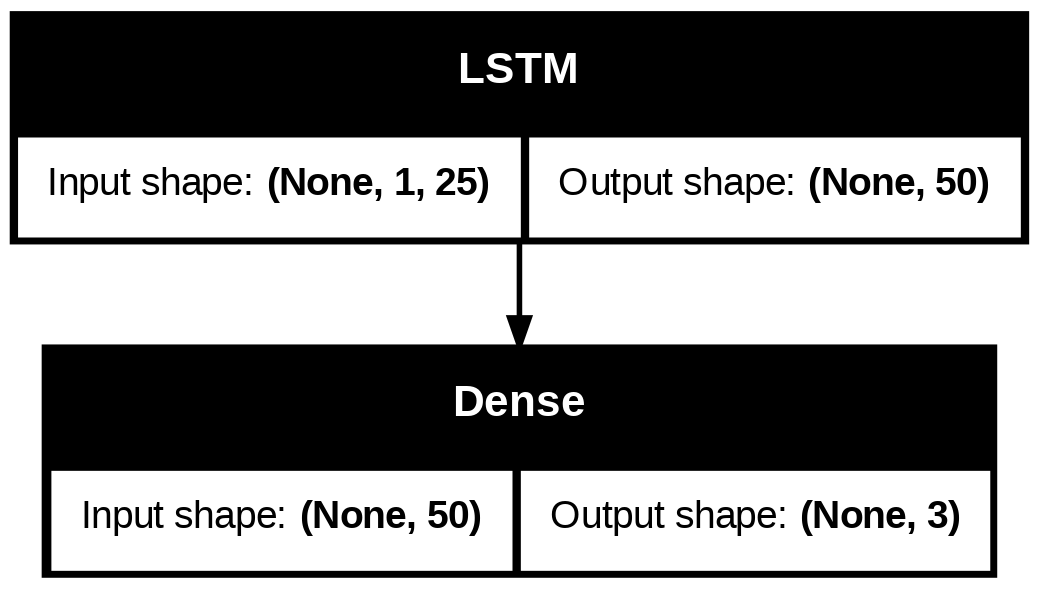

In [28]:
from tensorflow.keras.utils import plot_model
# Visualize the LSTM model structure with detailed shapes
plot_model(model_lstm, to_file='lstm_model_structure.png', show_shapes=True, expand_nested=True)

In [29]:
# Display a concise summary of the model
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,353 (59.97 KB)

 Trainable params: 15,353 (59.97 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train LSTM model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4092.3445 - val_loss: 7.4845
Epoch 2/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8380 - val_loss: 1.8940
Epoch 3/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6519 - val_loss: 1.1654
Epoch 4/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0993 - val_loss: 1.3175
Epoch 5/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9776 - val_loss: 1.6713
Epoch 6/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8836 - val_loss: 1.9300
Epoch 7/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9716 - val_loss: 1.6634
Epoch 8/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8852 - val_loss: 0.6274
Epoch 9/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8864 - val_loss: 0.4875
Epoch 10/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7524 - val_loss: 0.8041
Epoch 11/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9055 - val_loss: 0.4276
Epoch 12/50
1311/1311 ━━━━━

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predictions on training and test sets
train_predict = model_lstm.predict(X_train_lstm)
test_predict = model_lstm.predict(X_test_lstm)

# Calculate MSE and MAE for both training and test sets
mse_train = mean_squared_error(y_train, train_predict)
mae_train = mean_absolute_error(y_train, train_predict)
mse_test = mean_squared_error(y_test, test_predict)
mae_test = mean_absolute_error(y_test, test_predict)

# Print the results
print("Mean Squared Error on training set: {:.4f}".format(mse_train))
print("Mean Absolute Error on training set: {:.4f}".format(mae_train))
print("\nMean Squared Error on test set: {:.4f}".format(mse_test))
print("Mean Absolute Error on test set: {:.4f}".format(mae_test))

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error on training set: 0.3624
Mean Absolute Error on training set: 0.4766

Mean Squared Error on test set: 0.3565
Mean Absolute Error on test set: 0.4736


Mean Squared Error (LSTM) - Train: 0.3624252676963806, Test: 0.3564668893814087


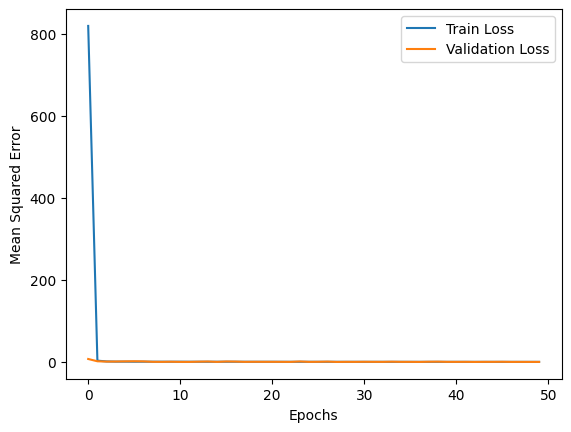

In [32]:
# Evaluate the LSTM model on both training and test sets
mse_train = model_lstm.evaluate(X_train_lstm, y_train, verbose=0)
mse_test = model_lstm.evaluate(X_test_lstm, y_test, verbose=0)

print(f'Mean Squared Error (LSTM) - Train: {mse_train}, Test: {mse_test}')

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

In [34]:
# Build RNN model with Input layer
model_rnn = Sequential()
model_rnn.add(Input(shape=(1, X_train.shape[1])))
model_rnn.add(SimpleRNN(50, activation='relu'))
model_rnn.add(Dense(3))  # Output layer with 3 nodes for the three zones
model_rnn.compile(optimizer='adam', loss='mse')

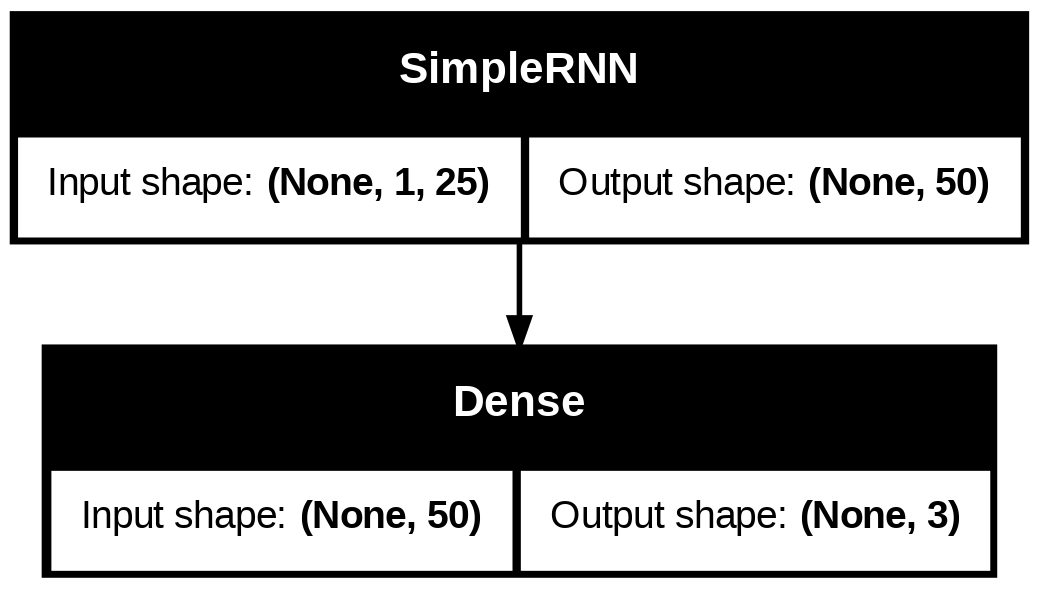

In [35]:
# Visualize the RNN model structure with detailed shapes
plot_model(model_rnn, to_file='rnn_model_structure.png', show_shapes=True, expand_nested=True)

In [36]:
# Display a concise summary of the RNN model
model_rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,953 (15.44 KB)

 Trainable params: 3,953 (15.44 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train RNN model
history_rnn = model_rnn.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 15154.5557 - val_loss: 33.0234
Epoch 2/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 26.1095 - val_loss: 12.9607
Epoch 3/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 11.7530 - val_loss: 9.9912
Epoch 4/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.3982 - val_loss: 5.9778
Epoch 5/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.6741 - val_loss: 3.6342
Epoch 6/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.0187 - val_loss: 4.5644
Epoch 7/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.3670 - val_loss: 1.4662
Epoch 8/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.9516 - val_loss: 3.1005
Epoch 9/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2717 - val_loss: 19.3798
Epoch 10/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.0660 - val_loss: 2.8918
Epoch 11/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4052 - val_loss: 1.2813
Epoch 12/50
1311/1311

In [38]:
# Predictions on training and test sets
train_predict_rnn = model_rnn.predict(X_train_lstm)
test_predict_rnn = model_rnn.predict(X_test_lstm)

# Calculate MSE and MAE for both training and test sets
mse_train_rnn = mean_squared_error(y_train, train_predict_rnn)
mae_train_rnn = mean_absolute_error(y_train, train_predict_rnn)
mse_test_rnn = mean_squared_error(y_test, test_predict_rnn)
mae_test_rnn = mean_absolute_error(y_test, test_predict_rnn)

# Print the results for RNN
print("Mean Squared Error on RNN training set: {:.4f}".format(mse_train_rnn))
print("Mean Absolute Error on RNN training set: {:.4f}".format(mae_train_rnn))
print("\nMean Squared Error on RNN test set: {:.4f}".format(mse_test_rnn))
print("Mean Absolute Error on RNN test set: {:.4f}".format(mae_test_rnn))

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error on RNN training set: 0.8944
Mean Absolute Error on RNN training set: 0.7441

Mean Squared Error on RNN test set: 0.8996
Mean Absolute Error on RNN test set: 0.7453


Mean Squared Error (RNN) - Train: 0.8943731784820557, Test: 0.8996279239654541


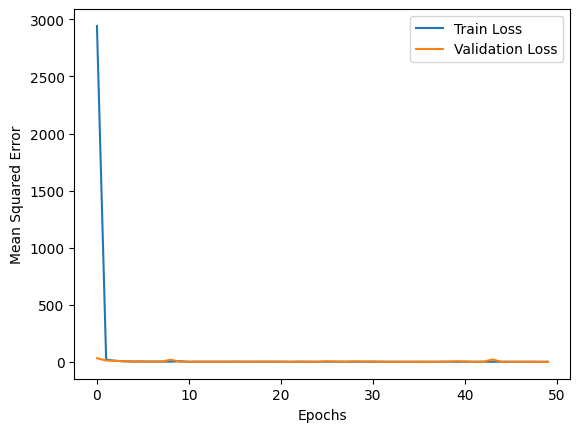

In [39]:
# Evaluate the RNN model on both training and test sets
mse_train_rnn = model_rnn.evaluate(X_train_lstm, y_train, verbose=0)
mse_test_rnn = model_rnn.evaluate(X_test_lstm, y_test, verbose=0)

print(f'Mean Squared Error (RNN) - Train: {mse_train_rnn}, Test: {mse_test_rnn}')

# Plot training history for RNN (optional)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

# Build the RNN model with additional LSTM layers and Dense layers
model_rnn = Sequential()

# First LSTM Layer with 128 units and return_sequences=True for stacking more LSTM layers
# model_rnn.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(LSTM(128, return_sequences=True, input_shape=(1, 25)))  # (time_steps=1, features=25)
model_rnn.add(Dropout(0.3))  # Adding Dropout for regularization

# Second LSTM Layer with 128 units and return_sequences=True for further stacking
model_rnn.add(LSTM(128, return_sequences=True))
model_rnn.add(Dropout(0.3))  # Adding Dropout for regularization

# Third LSTM Layer with 64 units and return_sequences=False for the final output layer
model_rnn.add(LSTM(64))
model_rnn.add(Dropout(0.3))

# Adding Batch Normalization to stabilize training
model_rnn.add(BatchNormalization())

# Additional Dense Layer with 64 units
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.3))

# Output Layer with 3 neurons (assuming regression)
model_rnn.add(Dense(3))

# Compile the model
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Model Summary
model_rnn.summary()

# Train the model
# history = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
history_rnn = model_rnn.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))



328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error (MSE): 0.4945148305331582
Root Mean Squared Error (RMSE): 0.7032174845189489


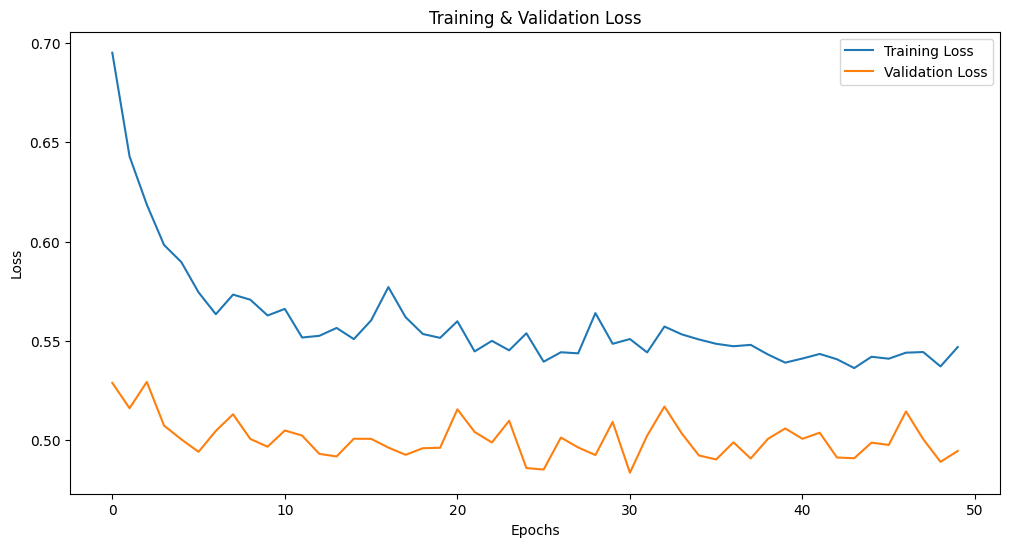

In [43]:
# Evaluate the model on test data
y_pred = model_rnn.predict(X_test_lstm)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 256)              │         157,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 256)              │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 638,723 (2.44 MB)

 Trainable params: 638,595 (2.44 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - loss: 1.1493 - val_loss: 0.5617 - learning_rate: 0.0010
Epoch 2/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - loss: 0.6782 - val_loss: 0.5303 - learning_rate: 0.0010
Epoch 3/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - loss: 0.6268 - val_loss: 0.5180 - learning_rate: 0.0010
Epoch 4/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.6157 - val_loss: 0.5022 - learning_rate: 0.0010
Epoch 5/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.5895 - val_loss: 0.4850 - learning_rate: 0.0010
Epoch 6/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 0.5880 - val_loss: 0.5211 - learning_rate: 0.0010
Epoch 7/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.5696 - val_loss: 0.5298 - learning_rate: 0.0010
Epoch 8/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - loss: 0.5897 - val_loss: 0.4962 - learning_rate: 0.0010
Epoch 9/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 0.5868 - val_loss: 0.512

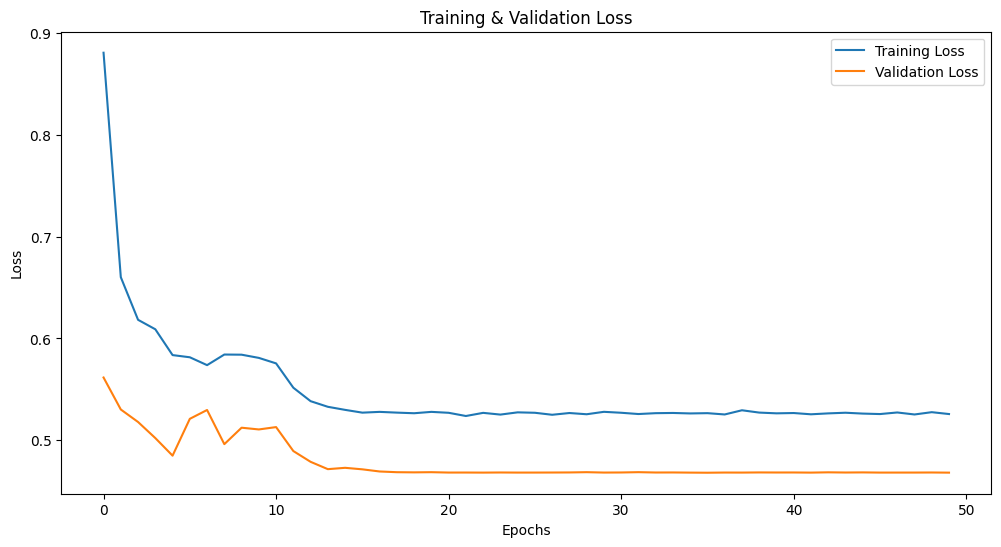

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define a learning rate scheduler function
def scheduler(epoch, lr):
    if epoch > 10:  # After 10 epochs, reduce the learning rate
        return lr * 0.5
    return lr

# Build the RNN model with Bidirectional LSTM layers, L2 regularization, and Dropout
model_rnn = Sequential()

# First Bidirectional LSTM Layer
model_rnn.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, 25)))  # Bidirectional LSTM
model_rnn.add(Dropout(0.4))  # Increased dropout for regularization

# Second Bidirectional LSTM Layer
model_rnn.add(Bidirectional(LSTM(128, return_sequences=True)))
model_rnn.add(Dropout(0.4))

# Third LSTM Layer with 64 units and return_sequences=False for the final output layer
model_rnn.add(LSTM(64))
model_rnn.add(Dropout(0.4))

# Adding Batch Normalization to stabilize training
model_rnn.add(BatchNormalization())

# Dense layer with L2 regularization
model_rnn.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model_rnn.add(Dropout(0.4))

# Output Layer with 3 neurons (for regression with 3 zones)
model_rnn.add(Dense(3))

# Compile the model
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Model Summary
model_rnn.summary()

# Use Learning Rate Scheduler as a callback
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history_rnn = model_rnn.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[lr_scheduler], verbose=1)

# Evaluate the model on test data
y_pred = model_rnn.predict(X_test_lstm)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
